**Data Understanding**

In [284]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

In [285]:
import warnings
warnings.filterwarnings('ignore')

In [286]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [287]:
df.shape

(167, 10)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [289]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [290]:
# Converting exports,health and imports percentages to actual values.

df['exports'] = df['exports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100

In [291]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


**Exploratory Data Analysis**

**Univariate Analysis**

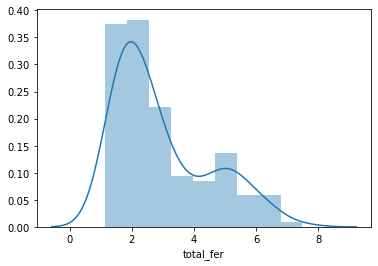

In [292]:
sns.distplot(df['total_fer'])
# fertility rates of majority of countries is between 1 and 3

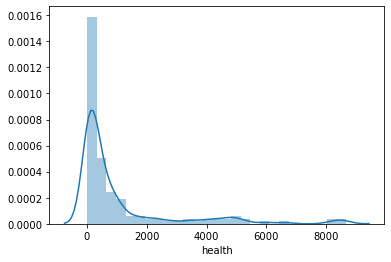

In [293]:
sns.distplot(df['health'])
# Total health spending per capita of large section of countries tends to left end of the graph clearly indicates the low level of development.

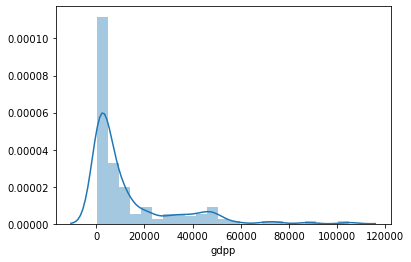

In [294]:
sns.distplot(df['gdpp'])
# Again as like previous two plots the graph is again largely skewed towards the left section of the plot indicating less than 5000 values of the Per capita income of majority of countries.

**Bivariate Analysis**

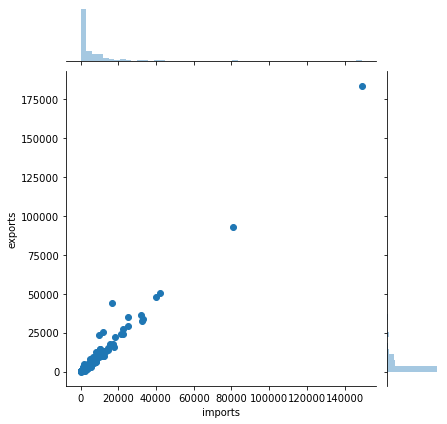

In [295]:
sns.jointplot(x='imports', y='exports', data=df)
# Strong correlation is observed between imports and exports

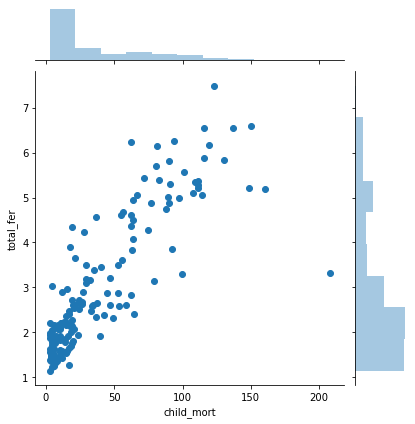

In [296]:
sns.jointplot(x='child_mort', y='total_fer', data=df)
# Good correlation between child mortality and total fertility rate is obseved

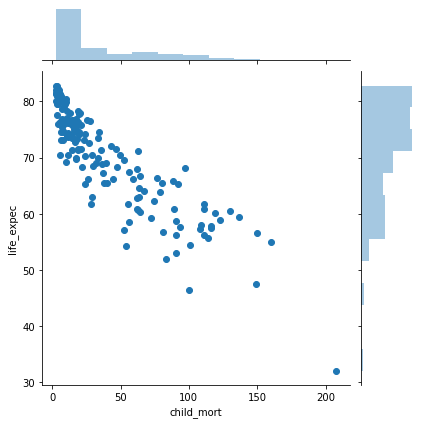

In [297]:
sns.jointplot(x='child_mort', y='life_expec', data=df)
# Strong negative correlation between child mortality and life expectancy

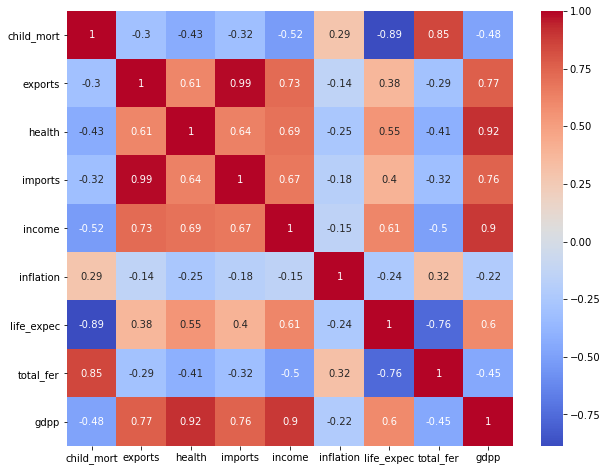

In [298]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

Observations:
1. High correlation between exports and imports with value of 0.99
2. High correlation between Child_mort and total_fer with value of 0.85
3. High negative correlation between Child_mort and life_expec with value of -0.89

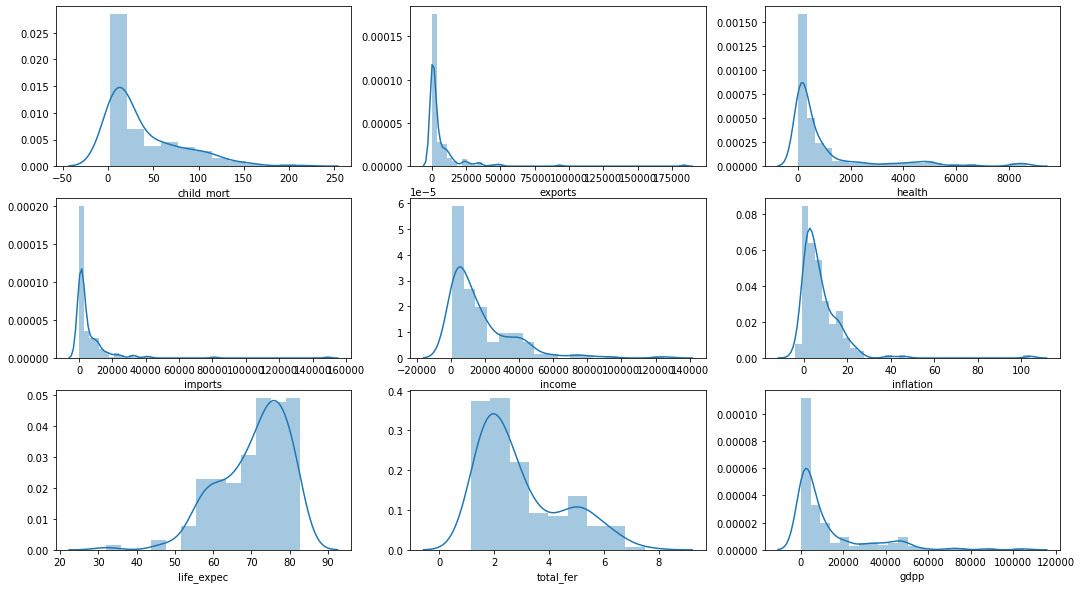

In [299]:
plt.figure(figsize = (18,10))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(df[i[1]])

Majority of the countries GDP per capita represented by column 'gdpp' is less than or equal to 5000. 

**OUTLIER ANALYSIS**

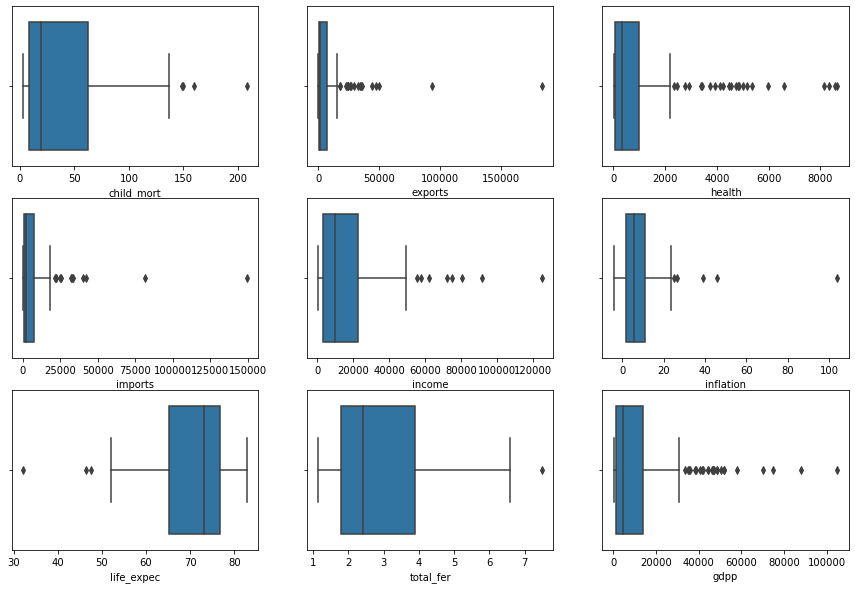

In [300]:
plt.figure(figsize = (15,10))
f = df.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x = i[1], data =df)

**For child_mort, inflation**: We should not deal with upper range outliers but we can deal with lower range outliers.

For rest of the columns we should ignore the lower range outliers but we can treat upper range outliers.

In [301]:
#Using capping 

q1 = df['child_mort'].quantile(0.98)
q2 = df['inflation'].quantile(0.98)
q3 = df['exports'].quantile(0.02)
q4 = df['health'].quantile(0.02)
q5 = df['imports'].quantile(0.02)
q6 = df['income'].quantile(0.02)
q7 = df['life_expec'].quantile(0.02)
q8 = df['total_fer'].quantile(0.02)
q9 = df['gdpp'].quantile(0.02)

df['child_mort'][df['child_mort']>= q1] = q1
df['inflation'][df['inflation']>= q2] = q2
df['exports'][df['exports']<=q3] = q3
df['health'][df['health']<=q4] = q4
df['imports'][df['imports']<=q5] = q5
df['income'][df['income']<=q6] = q6
df['life_expec'][df['life_expec']<=q7] = q7
df['total_fer'][df['total_fer']<=q8] = q8
df['gdpp'][df['gdpp']<=q9] = q9

In [302]:
# Obtaining the required description of the given dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.752934,7421.316657,1056.791031,6589.405857,17147.465389,7.113281,70.743162,2.949349,12965.456766
std,38.595229,17973.597241,1801.375306,14710.341156,19275.692310,6.833483,8.328687,1.512271,18327.801598
min,2.600000,53.483040,18.438976,124.418800,837.680000,-4.210000,52.352000,1.282800,364.320000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,145.160000,183750.000000,8663.600000,149100.000000,125000.000000,25.988000,82.800000,7.490000,105000.000000


# Clustering

In [303]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [304]:
hopkins(df.drop('country', axis =1))

0.8985545930335177

Hopkins Statistic value is consistantly above 93 which is a good indicator

# Scaling

In [305]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.36298718, -0.41105684, -0.56508263, ..., -1.75140468,
         1.90394781, -0.67928428],
       [-0.54971956, -0.35023552, -0.43925808, ...,  0.66919923,
        -0.86178756, -0.48571837],
       [-0.27164942, -0.31856982, -0.48486732, ...,  0.69328484,
        -0.03936265, -0.46546975],
       ...,
       [-0.37560088, -0.36150803, -0.53853068, ...,  0.28382946,
        -0.66281379, -0.63785669],
       [ 0.48199861, -0.39221166, -0.55063888, ..., -0.39056765,
         1.14121504, -0.63785669],
       [ 1.17847335, -0.38399724, -0.54054073, ..., -2.21481183,
         1.62538454, -0.62964779]])

In [306]:
df1 = pd.DataFrame(df1)
df1.columns = df.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.362987,-0.411057,-0.565083,-0.432361,-0.808489,0.341512,-1.751405,1.903948,-0.679284
1,-0.549720,-0.350236,-0.439258,-0.313759,-0.375560,-0.385041,0.669199,-0.861788,-0.485718
2,-0.271649,-0.318570,-0.484867,-0.353804,-0.221016,1.319056,0.693285,-0.039363,-0.465470
3,2.111438,-0.291418,-0.532405,-0.346035,-0.585260,2.243760,-1.281735,2.129451,-0.516365
4,-0.713443,-0.104372,-0.178806,0.040664,0.101600,-0.832715,0.729413,-0.543430,-0.041890


# KMeans Clustering

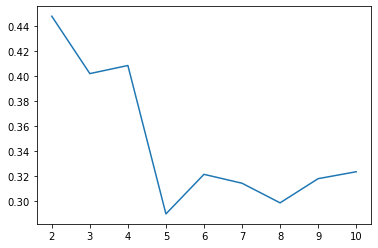

In [307]:
# Silhouette Analysis

from sklearn.metrics import silhouette_score
ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmean.labels_)])

sil =pd.DataFrame(ss)
plt.plot(sil[0], sil[1])

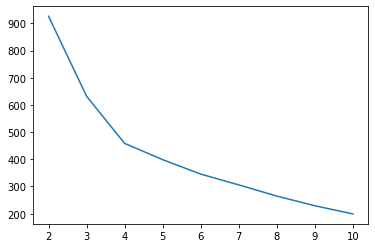

In [308]:
## Elbow Cuve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])
    
ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

# KMean with K=3

In [309]:
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(n_clusters=3, random_state=0)

In [310]:
kmean.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [311]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [312]:
## Adding the labels with the original DataFrame
df['cluster_id'] = kmean.labels_

In [313]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [314]:
# Check the number of Data Points in each cluster
df.cluster_id.value_counts()

1    91
0    48
2    28
Name: cluster_id, dtype: int64

There are sufficient number of countries in each column with cluster 1 having by far the highest number with 91

# Plotting the cluster WRT to the data

GDPP

Income

Child_Mort

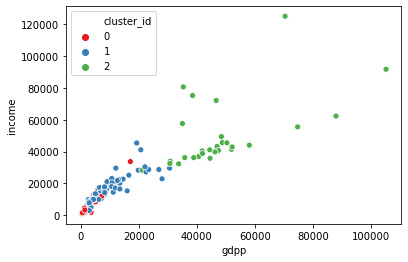

In [315]:
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'cluster_id', data = df, palette ='Set1')

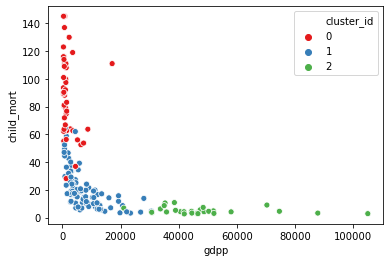

In [316]:
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

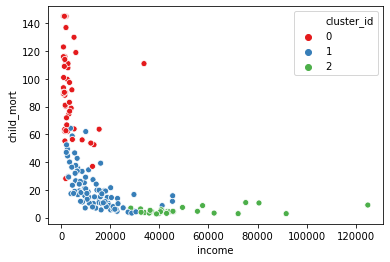

In [317]:
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'cluster_id', data = df, palette ='Set1')

**Cluster Profiling**


- GDPP
- Income
- Child_Mort

Finding the cluster with Low GDPP, Low Income and High Child_Mort

In [318]:
df[['child_mort', 'gdpp', 'cluster_id']].groupby('cluster_id').mean()

,child_mort,gdpp
cluster_id,,
0,89.811250,1913.735000
1,20.357143,7979.912088
2,5.046429,48114.285714


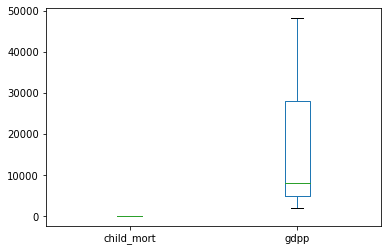

In [319]:
df[['child_mort', 'gdpp', 'cluster_id']].groupby('cluster_id').mean().plot(kind = 'box')

**Finding the countries**

Finding the top-5 countries that are actually in the requirement of the AID

In [320]:
c1 = df[df['cluster_id']==0]

In [321]:
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0


In [322]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
112,Niger,123.00,77.25600,18.438976,170.8680,837.68,2.55,58.8,7.49,364.32,0
37,"Congo, Dem. Rep.",116.00,137.27400,26.419400,165.6640,837.68,20.80,57.5,6.54,364.32,0
26,Burundi,93.60,53.48304,26.796000,124.4188,837.68,12.30,57.7,6.26,364.32,0
88,Liberia,89.30,62.45700,38.586000,302.8020,837.68,5.47,60.8,5.02,364.32,0
132,Sierra Leone,145.16,67.03200,52.269000,137.6550,1220.00,17.20,55.0,5.20,399.00,0


# Hierarchical Clustering
Single and Complete: Dendogram

Use one to perfrom final clustering

Plot

Profiling

In [323]:
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.362987,-0.411057,-0.565083,-0.432361,-0.808489,0.341512,-1.751405,1.903948,-0.679284
1,-0.549720,-0.350236,-0.439258,-0.313759,-0.375560,-0.385041,0.669199,-0.861788,-0.485718
2,-0.271649,-0.318570,-0.484867,-0.353804,-0.221016,1.319056,0.693285,-0.039363,-0.465470
3,2.111438,-0.291418,-0.532405,-0.346035,-0.585260,2.243760,-1.281735,2.129451,-0.516365
4,-0.713443,-0.104372,-0.178806,0.040664,0.101600,-0.832715,0.729413,-0.543430,-0.041890


In [324]:
# Importing relevant libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

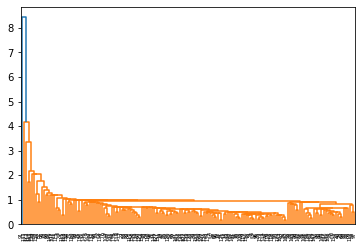

In [325]:
# single linkage
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

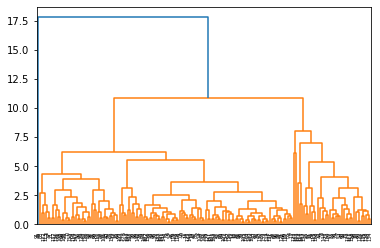

In [326]:
# complete linkage
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [327]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [328]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1,0


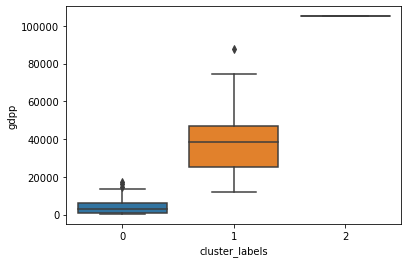

In [329]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

Cluster 2 countries have much greater Per Capita income (gdpp) than cluster 0 and 1 and have narrow range.

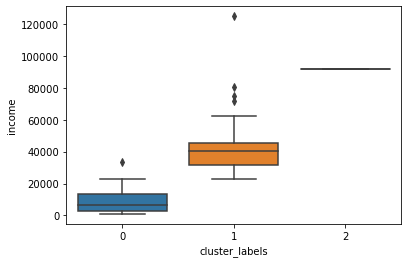

In [330]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df)

Similar to the above gdpp case here income of the same cluster 2 countries is highest

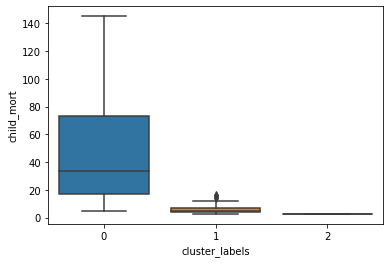

In [331]:
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

- Cluster 0 has low gdpp, low income and high child_mort
- Cluster 0 is the cluster containing all the countries with low income and GDP Per Capita and high child mortality rates.  

In [341]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(df1)

0.9233369602584526

It can be clearly seen the hopkins statistics function is continuously obtained above 90 which is a good indicator of cluster formation

In [342]:
c1 = df[df['cluster_id']==0]

In [343]:
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,0,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,0,0
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,0,0
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,0,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,0,0


In [344]:
c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
112,Niger,123.00,77.25600,18.438976,170.8680,837.68,2.55,58.8,7.49,364.32,0,0
37,"Congo, Dem. Rep.",116.00,137.27400,26.419400,165.6640,837.68,20.80,57.5,6.54,364.32,0,0
26,Burundi,93.60,53.48304,26.796000,124.4188,837.68,12.30,57.7,6.26,364.32,0,0
88,Liberia,89.30,62.45700,38.586000,302.8020,837.68,5.47,60.8,5.02,364.32,0,0
132,Sierra Leone,145.16,67.03200,52.269000,137.6550,1220.00,17.20,55.0,5.20,399.00,0,0


The top Five countries eligible to recieve financial aid are :-
- Niger
- Democratic Republic of Congo
- Burundi
- Liberia
- Sierra Leone